# Analyse datas bellesdemeures.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
data_full = pd.read_csv("immos_gir_2020-01-21.csv")

In [3]:
data_full.shape

(1507, 13)

In [4]:
data_full.describe()

,surface,field_surface,rooms,bedrooms,balcony,parking
count,1486.000000,8.460000e+02,1483.000000,1499.000000,168.000000,421.000000
mean,266.601615,3.109026e+04,7.611598,4.670447,1.255952,2.923990
std,286.371897,1.077305e+05,4.908631,2.639082,1.524243,3.164373
min,56.000000,2.200000e+01,2.000000,1.000000,1.000000,1.000000
25%,138.000000,5.157500e+02,5.000000,3.000000,1.000000,1.000000
50%,195.000000,1.400000e+03,6.000000,4.000000,1.000000,2.000000
75%,300.000000,7.517500e+03,9.000000,5.000000,1.000000,4.000000
max,6100.000000,1.200000e+06,99.000000,36.000000,20.000000,36.000000


ajout d'une colonne ID dans le dataset

In [5]:
# list_id = [i+1 for i in range (0,data_full.shape[0])]

In [6]:
# data_full.insert (0, "ID", list_id)

In [7]:
data_full.head()

,typeof,price,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,localisation,agency,link
0,Maison / Villa,1 863 000,475.0,15000.0,11.0,6.0,NON,NaN,OUI,NaN,Bordeaux,BORDEAUX AND BEYOND,https://www.bellesdemeures.com/annonces/vente/...
1,Hôtel particulier,1 596 500,315.0,220.0,10.0,6.0,NON,1.0,OUI,1.0,Bordeaux,GOOD WEEK,https://www.bellesdemeures.com/annonces/vente/...
2,Maison / Villa,1 400 000,250.0,270.0,7.0,5.0,NON,NaN,OUI,NaN,Bordeaux,MOVEMENT,https://www.bellesdemeures.com/annonces/vente/...
3,Maison / Villa,945 000,200.0,224.0,7.0,5.0,NON,NaN,NON,NaN,Bordeaux,GRANGE DELMAS IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...
4,Maison / Villa,881 500,190.0,1209.0,9.0,5.0,NON,NaN,NON,NaN,Bouliac,BORDEAUX AND BEYOND,https://www.bellesdemeures.com/annonces/vente/...


In [8]:
columns = data_full.columns.values
columns

array(['typeof', 'price', 'surface', 'field_surface', 'rooms', 'bedrooms',
       'terrace', 'balcony', 'pool', 'parking', 'localisation', 'agency',
       'link'], dtype=object)

In [9]:
data_full.dtypes

typeof            object
price             object
surface          float64
field_surface    float64
rooms            float64
bedrooms         float64
terrace           object
balcony          float64
pool              object
parking          float64
localisation      object
agency            object
link              object
dtype: object

La colonne price est considérée comme non numérique , il faut changer son format

## Analyse price et modification type colonne
 Modification du format des prix , changement de la colonne price en numerique et distribution

Il faut chercher toutes les lignes avec un prix qui contient des lettres pour pouvoir le modifier

In [10]:
wrong_prices_df = data_full[data_full['price'].str.contains('[a-z]+', regex=True)]
wrong_prices_df

,typeof,price,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,localisation,agency,link
142,Maison / Villa,De 3M à 10M,750.0,1350.0,12.0,5.0,NON,NaN,NON,NaN,Arcachon,BARNES BASSIN D'ARCACHON,https://www.bellesdemeures.com/annonces/vente/...
179,Loft/Atelier/Surface,"De 1,7M à 3M",255.0,NaN,6.0,4.0,OUI,NaN,NON,2.0,Arcachon,L'AGENCE MANON PARIS,https://www.bellesdemeures.com/annonces/vente/...
197,Appartement,"De 1,7M à 3M",203.0,NaN,4.0,3.0,OUI,NaN,NON,NaN,Bordeaux,BORDEAUX PROPERTIES,https://www.bellesdemeures.com/annonces/vente/...
944,Maison / Villa,+ de 10M,3200.0,900000.0,25.0,6.0,NON,NaN,NON,NaN,Bordeaux,BARNES PROPRIETES ET CHATEAUX,https://www.bellesdemeures.com/annonces/vente/...
1037,Maison / Villa,De 3M à 10M,850.0,240000.0,20.0,5.0,OUI,NaN,NON,36.0,Bordeaux,JANE,https://www.bellesdemeures.com/annonces/vente/...
1076,Château,De 3M à 10M,400.0,500000.0,15.0,8.0,NON,NaN,NON,NaN,Blaye,Groupe Mercure Bordeaux - Aquitaine,https://www.bellesdemeures.com/annonces/vente/...
1437,Château,De 3M à 10M,3000.0,680000.0,30.0,NaN,NON,NaN,NON,NaN,Bordeaux,DENNIEL IMMOBILIER - ANTIQUAIRES EN IMMEUBLES,https://www.bellesdemeures.com/annonces/vente/...
1443,Maison / Villa,"De 1,1M à 1,7M",180.0,1000.0,7.0,5.0,NON,NaN,OUI,NaN,La Teste-de-Buch,ATELIERS LOFTS & ASSOCIES,https://www.bellesdemeures.com/annonces/vente/...


On enregistre le numéro des lignes pour verification finale

In [11]:
wprices_index = wrong_prices_df.index

#### Modification des prix à l'aide des regex
    On remplace toutes les virgules par des points
    On cherche ensuite tout les valeurs numériques ou décimales
    - \d* 0 or more digits
    - \.? optional dot because in regex . is a special character
    - \d* 0 ore more digits ( decimal part )
    
    On se retrouve avec des listes avec les valeurs numériques qui nous interesse 
    On boucle sur chacune de ces listes pour faire une moyenne de ces valeurs numériques Ex : de 3 à 10M = (3+10)/2 * 1M
    On passe tout en millions , cette fonction ne fonctionnera pas si les prix dans un mauvais format ne sont pas en millions d'euros


In [12]:
good_prices = []
for wrong_price in wrong_prices_df['price']:
    print(wrong_price)
    wrong_price = wrong_price.replace(',', '.')
    numbers_price = re.findall("\d*\.?\d*", wrong_price)
    print(numbers_price)
    sum = 0
    i = 0
    for number in numbers_price:
        if number != '':
            sum += float(number)
            i += 1
    good_price = (sum/i)*1000000
    good_prices.append(good_price)


print(good_prices)

De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
De 1,7M à 3M
['', '', '', '1.7', '', '', '', '', '3', '', '']
De 1,7M à 3M
['', '', '', '1.7', '', '', '', '', '3', '', '']
+ de 10M
['', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
De 3M à 10M
['', '', '', '3', '', '', '', '', '10', '', '']
De 1,1M à 1,7M
['', '', '', '1.1', '', '', '', '', '1.7', '', '']
[6500000.0, 2350000.0, 2350000.0, 10000000.0, 6500000.0, 6500000.0, 6500000.0, 1400000.0]


On change maintenant toutes les lignes ou le prix pose probleme par le bon

In [13]:
data_full.loc[data_full['price'].str.contains('[a-z]+', regex=True), 'price'] = good_prices

Verification

In [14]:
for index in wprices_index:
    print(data_full.loc[index]['price'])

6500000.0
2350000.0
2350000.0
10000000.0
6500000.0
6500000.0
6500000.0
1400000.0


In [15]:
# les prix sont sous la forme 1 590 000 , on enleve les espaces
data_full['price'] = data_full['price'].replace('\s+', '', regex=True)
data_full['price']

0       1863000
1       1596500
2       1400000
3        945000
4        881500
         ...   
1502    1050000
1503    2150000
1504    2150000
1505     795000
1506     640000
Name: price, Length: 1507, dtype: object

In [16]:
data_full['price'] = pd.to_numeric(data_full['price'])

In [17]:
data_full['price'].dtypes

dtype('float64')

In [18]:
data_full.price.isna().sum()

0

In [19]:
data_full['price'].describe()

count    1.507000e+03
mean     1.227469e+06
std      1.015451e+06
min      3.590000e+05
25%      7.154125e+05
50%      9.200000e+05
75%      1.378000e+06
max      1.600000e+07
Name: price, dtype: float64

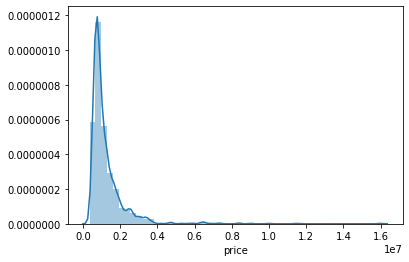

In [20]:
sns.distplot(data_full['price'])

In [21]:
# data_full['price'] = np.log(data_full['price'])
# sns.distplot(data_full['price'])

## Division des datas en valeurs numériques ( quantitative ) et catégorielles ( qualititative ) 

In [22]:
data_full.dtypes

typeof            object
price            float64
surface          float64
field_surface    float64
rooms            float64
bedrooms         float64
terrace           object
balcony          float64
pool              object
parking          float64
localisation      object
agency            object
link              object
dtype: object

In [23]:
qual = data_full.select_dtypes(include=['object']).columns
print(qual)

Index(['typeof', 'terrace', 'pool', 'localisation', 'agency', 'link'], dtype='object')


In [24]:
quan = data_full.select_dtypes(include=['int64','float64']).columns
quan = quan.drop(pd.Index(['price']))
print(quan)

Index(['surface', 'field_surface', 'rooms', 'bedrooms', 'balcony', 'parking'], dtype='object')


In [25]:
print(f"{len(qual)} catégorielles et {len(quan)} numériques")

6 catégorielles et 6 numériques


In [26]:
corrmat = data_full.corr()
corrmat

,price,surface,field_surface,rooms,bedrooms,balcony,parking
price,1.000000,0.544140,0.448751,0.414262,0.355433,0.046965,0.254548
surface,0.544140,1.000000,0.484572,0.819179,0.731695,0.220625,0.359220
field_surface,0.448751,0.484572,1.000000,0.446060,0.327110,-0.046489,0.227295
rooms,0.414262,0.819179,0.446060,1.000000,0.830613,0.068276,0.386359
bedrooms,0.355433,0.731695,0.327110,0.830613,1.000000,-0.001651,0.250952
balcony,0.046965,0.220625,-0.046489,0.068276,-0.001651,1.000000,-0.178053
parking,0.254548,0.359220,0.227295,0.386359,0.250952,-0.178053,1.000000


## Analyse features numériques

In [27]:
data_full.shape

(1507, 13)

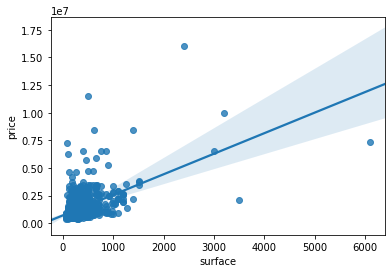

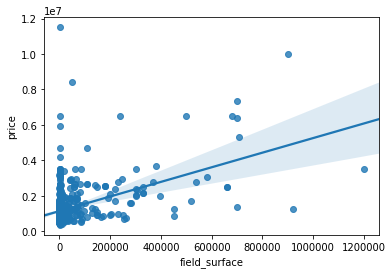

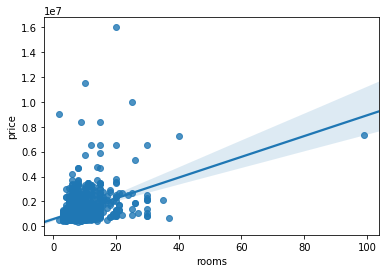

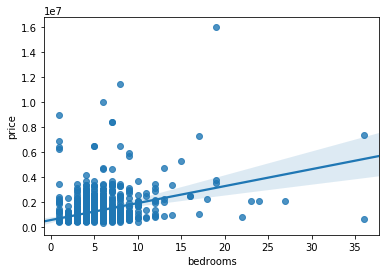

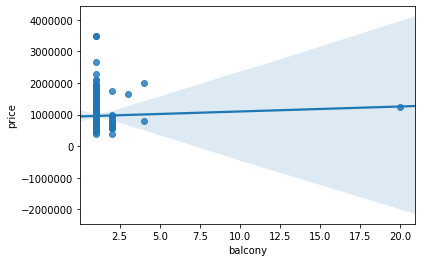

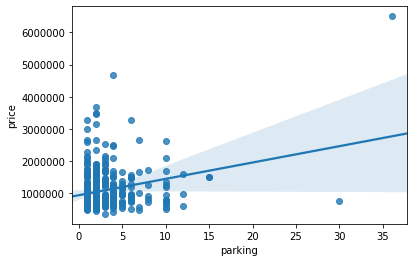

In [28]:
for feature in data_full[quan]:
    sns.regplot(x=feature,y='price', data=data_full)
    plt.show()

In [29]:
shape_before_outliers = data_full.shape[0]

### Certaines features semblent avoir des outliers , Analyse une par une

* #### Surface


corr : 0.54


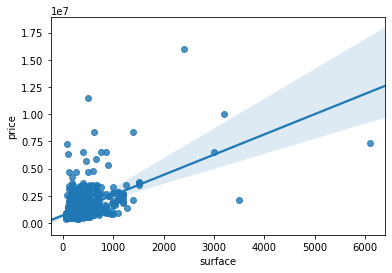

In [30]:
sns.regplot(x='surface',y='price', data=data_full)
print(f"corr : {round(data_full['surface'].corr(data_full['price']),2)}")

corr : 0.57


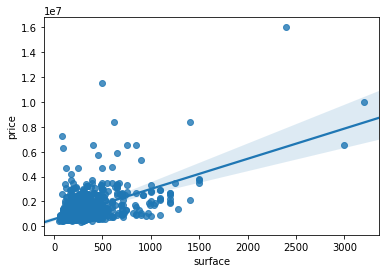

In [31]:
data_full = data_full.drop(data_full[(data_full['surface']>3400)].index).reset_index(drop=True)
sns.regplot(x='surface',y='price', data=data_full)
print(f"corr : {round(data_full['surface'].corr(data_full['price']),2)}")

In [32]:
data_full.shape

(1505, 13)

* #### Field_surface

corr : 0.42


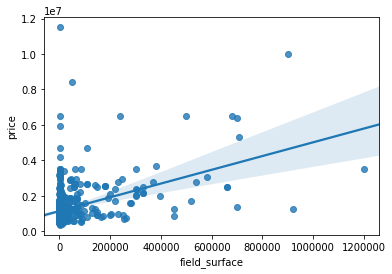

In [33]:
sns.regplot(x='field_surface',y='price', data=data_full)
print(f"corr : {round(data_full['field_surface'].corr(data_full['price']),2)}")

corr : 0.44


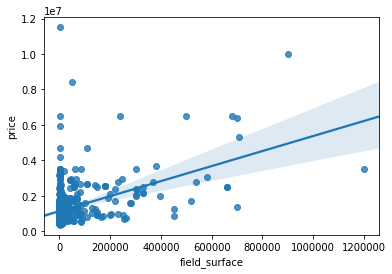

In [34]:
data_full = data_full.drop(data_full[(data_full['field_surface']>800000) & (data_full['price'] < 2000000) ].index).reset_index(drop=True)
sns.regplot(x='field_surface',y='price', data=data_full)
print(f"corr : {round(data_full['field_surface'].corr(data_full['price']),2)}")

* #### Bedrooms

In [35]:
data_full.shape

(1504, 13)

corr : 0.33


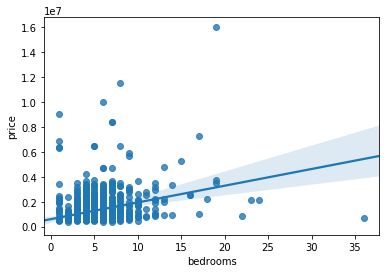

In [36]:
sns.regplot(x='bedrooms',y='price', data=data_full)
print(f"corr : {round(data_full['bedrooms'].corr(data_full['price']),2)}")

corr : 0.36


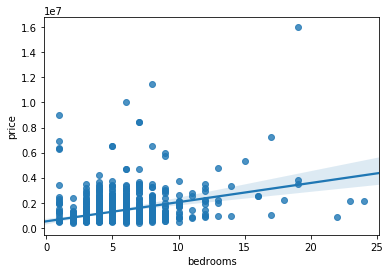

In [37]:
data_full = data_full.drop(data_full[(data_full['bedrooms']>35) ].index).reset_index(drop=True)
sns.regplot(x='bedrooms',y='price', data=data_full)
print(f"corr : {round(data_full['bedrooms'].corr(data_full['price']),2)}")

In [38]:
nb_outliers = shape_before_outliers - data_full.shape[0]
print(f"On a enlevé {nb_outliers} outliers")

On a enlevé 4 outliers


In [39]:
data_full.shape

(1503, 13)

## Traitement des valeurs manquantes dans le dataset

In [41]:
def hasnan(dataset):
    hasNAN = round((dataset.isnull().sum() / len(dataset)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
    hasNAN = hasNAN[hasNAN > 0] # On enleve celles qui n'ont pas de valeurs nulles 
    hasNAN = hasNAN.sort_values(ascending=False)
    missing_values = pd.DataFrame({'Missing Ratio': hasNAN})
    return missing_values

In [42]:
hasnan(data_full)

,Missing Ratio
balcony,88.82
parking,71.99
field_surface,43.91
rooms,1.53
surface,1.33
bedrooms,0.47


In [43]:
data_full.shape

(1503, 13)

### balcony
On considère que NA signifie pas de balcon

### parking
On considère que NA signie pas de parking

### field_surface

In [44]:
data_full.typeof.value_counts()

Maison / Villa          1058
Appartement              355
Château                   63
Hôtel particulier         15
Loft/Atelier/Surface      12
Name: typeof, dtype: int64

In [45]:
data_full['field_surface'].isnull().sum()

660

44% des biens n'ont pas de surface du terrain renseigné , certains sont des appartements ou des lofts ce qui parait normal ( pas de terrain )

In [46]:
app_surface_null = data_full.loc[(data_full['typeof'] == 'Appartement') & (data_full['field_surface'].isnull())]
len(app_surface_null)

355

In [47]:
loft_surface_null = data_full.loc[(data_full['typeof'] == 'Loft/Atelier/Surface') & (data_full['field_surface'].isnull())]
len(loft_surface_null)

12

In [48]:
house_surface_null = data_full.loc[(data_full['typeof'] == 'Maison / Villa') & (data_full['field_surface'].isnull())]
len(house_surface_null)

272

In [49]:
other_surface_null = data_full.loc[(data_full['typeof'] != 'Appartement') & (data_full['typeof'] != 'Loft/Atelier/Surface') & (data_full['field_surface'].isnull())]
len(other_surface_null)

293

293 batiments qui ne sont pas des appartements ou des lofts n'ont pas de surface indiqués , peut etre qu'ils ont un terrain mais dont la taille n'est pas mise en avant dans l'annonce

In [50]:
round(data_full.loc[data_full['field_surface'].notnull()]['field_surface'].mean(),2)

29219.88

In [51]:
mode_field_surface = data_full.loc[data_full['field_surface'].notnull()]['field_surface'].mode()
print(mode_field_surface)
len(data_full.loc[data_full['field_surface'] == float(mode_field_surface)])


0    1200.0
dtype: float64


14

In [52]:
median_field_surface = data_full.loc[data_full['field_surface'].notnull()]['field_surface'].median()
median_field_surface

1386.0

In [53]:
# for index in other_surface_null.index:
#     print(data_full.loc[index]['link'])

#### Traitement des NA
On constate que la moyenne des terrains dont la taille est indiqué est de 29220 m² ce qui est énorme , remplacer les valeurs manquantes par cette valeur ne semble pas judicieux , concernant le mode il est de 1200m² mais n'apparait que 14 fois dans l'ensemble du dataset. On va donc remplacer toutes les valeurs manquantes par 0 pour les appartements et les lofts et par la médiane (1386 m² )  pour les autres en estimant que les maisons , hotels particuliers et chateau doivent avoir un terrain

### rooms
Analyse des biens dont le nombre de pièces n'est pas précisé

In [54]:
rooms_na = data_full.loc[data_full['rooms'].isnull()]
len(rooms_na)

23

In [55]:
rooms_na

,typeof,price,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,localisation,agency,link
192,Maison / Villa,1863000.0,470.0,10500.0,NaN,1.0,NON,NaN,OUI,NaN,Cénac,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
648,Appartement,495000.0,73.0,NaN,NaN,NaN,OUI,NaN,NON,NaN,Bordeaux,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
658,Hôtel particulier,3440000.0,650.0,NaN,NaN,1.0,OUI,NaN,OUI,NaN,Bordeaux,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
763,Maison / Villa,895000.0,209.0,NaN,NaN,4.0,NON,NaN,OUI,NaN,Saint-Médard-en-Jalles,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
777,Maison / Villa,795000.0,177.0,NaN,NaN,3.0,OUI,NaN,NON,NaN,Bordeaux,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
840,Maison / Villa,3074000.0,650.0,580000.0,NaN,6.0,NON,NaN,NON,NaN,Bordeaux,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...
842,Maison / Villa,1915000.0,1200.0,17500.0,NaN,12.0,OUI,NaN,OUI,NaN,La Brède,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...
852,Maison / Villa,6390000.0,NaN,700000.0,NaN,1.0,NON,NaN,NON,NaN,Bordeaux,BARNES PROPRIETES ET CHATEAUX,https://www.bellesdemeures.com/annonces/vente/...
919,Maison / Villa,2450000.0,330.0,NaN,NaN,1.0,NON,NaN,OUI,NaN,Bordeaux,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
921,Hôtel particulier,1735000.0,316.0,NaN,NaN,5.0,NON,NaN,OUI,NaN,Eysines,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...


#### Traitement des NA

Par soucis d'automatisation et rapidité , on va supprimer tout les biens dont le nombre de pièces n'est pas précisé ( le nombre n'est pas important sur l'ensemble du dataset moins de 2 % )  , On pourrait regarder annonce par annonce , ou se dire qu'un bien a forcement une pièce . De plus dans le dataset il semble que le nombre de chambres est compris dans le nombres de pieces ( rooms > bedrooms quand il y'a les deux infos ) on pourrait remplir tout les rooms avec bedrooms + 1 mais ca ne refléterais pas forcement la réalité du bien

### bedrooms
Analyse des biens dont le nombre de chambres n'est pas précisés

In [56]:
bedrooms_na = data_full.loc[data_full['bedrooms'].isnull()]
len(bedrooms_na)

7

In [57]:
bedrooms_na

,typeof,price,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,localisation,agency,link
648,Appartement,495000.0,73.0,NaN,NaN,NaN,OUI,NaN,NON,NaN,Bordeaux,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
828,Appartement,590000.0,110.0,NaN,4.0,NaN,NON,NaN,NON,NaN,Bordeaux,SCOUT HOME,https://www.bellesdemeures.com/annonces/vente/...
1396,Appartement,538000.0,120.0,NaN,6.0,NaN,NON,NaN,NON,NaN,Bordeaux,MENA IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...
1404,Hôtel particulier,1070000.0,240.0,NaN,8.0,NaN,NON,NaN,NON,NaN,Bordeaux,MENA IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...
1434,Château,6500000.0,3000.0,680000.0,30.0,NaN,NON,NaN,NON,NaN,Bordeaux,DENNIEL IMMOBILIER - ANTIQUAIRES EN IMMEUBLES,https://www.bellesdemeures.com/annonces/vente/...
1462,Hôtel particulier,3328000.0,1000.0,NaN,12.0,NaN,NON,NaN,NON,NaN,Bordeaux,Agence immobilière du Grand-Théâtre,https://www.bellesdemeures.com/annonces/vente/...
1471,Château,2680000.0,650.0,80000.0,NaN,NaN,NON,NaN,NON,NaN,Bordeaux,INVEST-BORDEAUX,https://www.bellesdemeures.com/annonces/vente/...


#### Traitement des NA

Meme traitement que pour les pièces , on supprime le nombre de biens qui n'ont pas de chambres renseignés , le nombre total n'est pas trés important , on pourrait mettre au moins 1 chambre à chaque bien , ou verifier annonce par annonce

### Surface

In [61]:
surface_na = data_full.loc[data_full['surface'].isnull()]
len(surface_na)

20

In [62]:
surface_na

,typeof,price,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,localisation,agency,link
68,Château,895000.0,NaN,12000.0,9.0,5.0,NON,NaN,NON,NaN,Branne,BARNES PROPRIETES ET CHATEAUX,https://www.bellesdemeures.com/annonces/vente/...
653,Maison / Villa,2332000.0,NaN,305053.0,20.0,5.0,NON,NaN,OUI,NaN,Libourne,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...
654,Maison / Villa,990000.0,NaN,13300.0,12.0,6.0,NON,NaN,NON,NaN,Saint-Émilion,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
835,Maison / Villa,1433250.0,NaN,NaN,15.0,7.0,NON,NaN,OUI,NaN,Saint-Émilion,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...
837,Maison / Villa,960000.0,NaN,NaN,9.0,6.0,OUI,NaN,OUI,NaN,Quinsac,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
838,Appartement,699000.0,NaN,NaN,5.0,2.0,OUI,NaN,NON,NaN,Bordeaux,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...
852,Maison / Villa,6390000.0,NaN,700000.0,NaN,1.0,NON,NaN,NON,NaN,Bordeaux,BARNES PROPRIETES ET CHATEAUX,https://www.bellesdemeures.com/annonces/vente/...
855,Château,2332000.0,NaN,NaN,16.0,8.0,NON,NaN,NON,NaN,Le Taillan-Médoc,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...
878,Château,979000.0,NaN,NaN,19.0,5.0,NON,NaN,NON,NaN,Langon,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...
931,Château,1490000.0,NaN,27000.0,NaN,5.0,NON,NaN,NON,NaN,Blaye,MAXWELL-BAYNES,https://www.bellesdemeures.com/annonces/vente/...


In [65]:
# Lien des biens qui n'ont pas de surface indiqué
# for index in surface_na.index:
#     print(data_full.loc[index]['link'])

Il semble que les biens dont les surfaces ne sont pas indiqués ont des surfaces modestes dont la taille n'est pas mise en avant par l'agence , mais il y'a aussi des biens trés onéreux dont la surface n'est pas indiqué et utiliser une médiane ou une moyenne ne semble pas trés judicieux ( on va se retrouver avec des biens trés cher et des surfaces modestes ce qui va nuire à la qualité du modèle ) , on va supprimer ces biens la par soucis de facilité

In [66]:
def remplace_na(dataset):
    dataset["balcony"] = dataset["balcony"].fillna("None")
    dataset["parking"] = dataset["parking"].fillna("None")
    
    # remplacer field_surface pour appartement & loft = 0 , pour les autres par la médiane
    dataset.loc[((dataset['typeof'] == 'Appartement') | (dataset['typeof'] == 'Loft/Atelier/Surface')) & (dataset['field_surface'].isnull()) ,'field_surface'] = 0
    dataset.loc[(dataset['typeof'] != 'Appartement') & (dataset['typeof'] != 'Loft/Atelier/Surface') & (dataset['field_surface'].isnull()) ,'field_surface'] = dataset.loc[dataset['field_surface'].notnull()]['field_surface'].median()

    # On supprime tout les biens dont le nombre de pièces n'est pas renseigné
    rooms_na = dataset.loc[dataset['rooms'].isnull()]
    dataset = dataset.drop(rooms_na.index, axis=0)
    
    # On supprime tout les biens dont le nombre de chambre n'est pas renseigné
    bedrooms_na = dataset.loc[dataset['bedrooms'].isnull()]
    dataset = dataset.drop(bedrooms_na.index, axis=0)
    
    # On supprime tout les biens dont la surface n'est pas renseigné
    surface_na = dataset.loc[dataset['surface'].isnull()]
    dataset = dataset.drop(surface_na.index, axis=0)
    
    
    return dataset

In [68]:
data_full = remplace_na(data_full)
data_full.shape

(1461, 13)

In [69]:
hasnan(data_full)

,Missing Ratio


Tout les NA ont bien été traités.

## Analyse features catégorielles
    a faire 
    modifier typeof avec map 
    dummies terrasse , pool , localisation 
    on vire agency et link

## Type de bien

In [70]:
data_full.typeof.value_counts()

Maison / Villa          1033
Appartement              349
Château                   56
Loft/Atelier/Surface      12
Hôtel particulier         11
Name: typeof, dtype: int64

In [71]:
#Moyenne de la surface des biens de type "Maison/Villa"
meansur_house =  data_full.loc[data_full['typeof'] == 'Maison / Villa']['surface'].mean()
meansur_apartment =  data_full.loc[data_full['typeof'] == 'Appartement']['surface'].mean()
meansur_castle =  data_full.loc[data_full['typeof'] == 'Château']['surface'].mean()
meansur_hostel =  data_full.loc[data_full['typeof'] == 'Hôtel particulier']['surface'].mean()
meansur_loft =  data_full.loc[data_full['typeof'] == 'Loft/Atelier/Surface']['surface'].mean()

In [72]:
print(f"Surface moyenne des maisons : {round(meansur_house,2)}")
print(f"Surface moyenne des appartements : {round(meansur_apartment,2)}")
print(f"Surface moyenne des chateaux : {round(meansur_castle,2)}")
print(f"Surface moyenne des hotels particuliers : {round(meansur_hostel,2)}")
print(f"Surface moyenne des lofts : {round(meansur_loft,2)}")

Surface moyenne des maisons : 270.45
Surface moyenne des appartements : 132.71
Surface moyenne des chateaux : 733.2
Surface moyenne des hotels particuliers : 501.82
Surface moyenne des lofts : 211.67
